In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import PIL
import cv2 as cv

import copy
import os, sys
import time
import math
from tqdm import tqdm

In [2]:
org_path = r'C:\Users\done-\Desktop\squares_image_colorization'
dest_path = r'C:\Users\done-\Desktop\squares_image_colorization_pix2pix'

In [3]:
print('Total images: {}'.format(len(os.listdir(org_path))))

Total images: 4728


In [4]:
all_images = os.listdir(org_path)

In [5]:
def create_dataset():
    all_images = os.listdir(org_path)
    np.random.seed(439) #Set random seed to get always the same sampling
    valid_imgs = list(np.random.choice(all_images, 100)) #100 validation examples
    all_images = [i for i in all_images if i not in valid_imgs] #Remove images belonging to the validation set
    test_imgs = list(np.random.choice(all_images, 28)) #28 test examples
    train_images = [i for i in all_images if i not in test_imgs] #Remove images belonging to the test set
    
    phases = ['training', 'validation', 'test']
    for phase in phases:
        if phase == 'training':
            print('Start to process {} images..\n'.format(phase))
            for name_img in tqdm(train_images):
                im = cv.imread(org_path+'/'+name_img) #Load image
                im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY) #Convert to BW
                img_gray2 = np.zeros_like(im) #BW images must have 3 channels
                img_gray2[:,:,0] = im_gray
                img_gray2[:,:,1] = im_gray
                img_gray2[:,:,2] = im_gray
                im_gray = img_gray2
                im_conc = np.concatenate((im_gray, im), axis=1) #Concat horizontally BW and color img into one
                im_fin = cv.resize(im_conc, (512, 256)) #resize for pix2pix input size
                #now, save image in the new folders, depending on its belonging to train, val or test.
                cv.imwrite(dest_path+'/piazze/train/'+name_img, im_fin)
        elif phase == 'validation':
            print('Start to process {} images..\n'.format(phase))
            for name_img in tqdm(valid_imgs):
                im = cv.imread(org_path+'/'+name_img) #Load image
                im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY) #Convert to BW
                img_gray2 = np.zeros_like(im) #BW images must have 3 channels
                img_gray2[:,:,0] = im_gray
                img_gray2[:,:,1] = im_gray
                img_gray2[:,:,2] = im_gray
                im_gray = img_gray2
                im_conc = np.concatenate((im_gray, im), axis=1) #Concat horizontally BW and color img into one
                im_fin = cv.resize(im_conc, (512, 256)) #resize for pix2pix input size
                #now, save image in the new folders, depending on its belonging to train, val or test.
                cv.imwrite(dest_path+'/piazze/val/'+name_img, im_fin)
        else:
            print('Start to process {} images..\n'.format(phase))
            for name_img in tqdm(test_imgs):
                im = cv.imread(org_path+'/'+name_img) #Load image
                im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY) #Convert to BW
                img_gray2 = np.zeros_like(im) #BW images must have 3 channels
                img_gray2[:,:,0] = im_gray
                img_gray2[:,:,1] = im_gray
                img_gray2[:,:,2] = im_gray
                im_gray = img_gray2
                im_conc = np.concatenate((im_gray, im), axis=1) #Concat horizontally BW and color img into one
                im_fin = cv.resize(im_conc, (512, 256)) #resize for pix2pix input size
                #now, save image in the new folders, depending on its belonging to train, val or test.
                cv.imwrite(dest_path+'/piazze/test/'+name_img, im_fin)

Run the code

In [6]:
create_dataset()

Start to process training images..



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4601/4601 [03:17<00:00, 23.32it/s]


Start to process validation images..



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.98it/s]


Start to process test images..



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 20.60it/s]


--------------------------

### Test codice 

In [5]:
im = cv.imread(org_path+'/'+all_images[0])

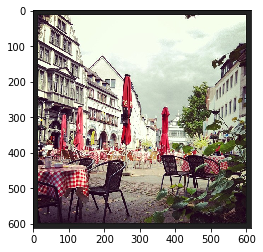

In [22]:
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))

In [7]:
im.shape

(612, 612, 3)

In [8]:
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

In [9]:
im_gray.shape

(612, 612)

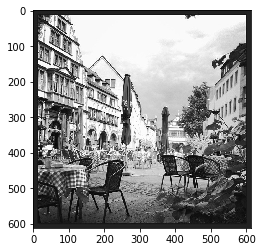

In [10]:
plt.imshow(im_gray, cmap='gray')

In [11]:
img2 = np.zeros_like(im)
img2[:,:,0] = im_gray
img2[:,:,1] = im_gray
img2[:,:,2] = im_gray

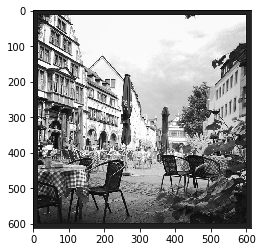

In [12]:
plt.imshow(img2, cmap='gray')

In [13]:
# cv.imwrite('ciao.jpg', img2)

In [14]:
img2.shape

(612, 612, 3)

In [15]:
fin = np.concatenate((img2, im), axis=1)

In [16]:
fin.shape

(612, 1224, 3)

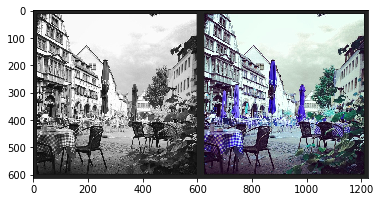

In [17]:
plt.imshow(fin)

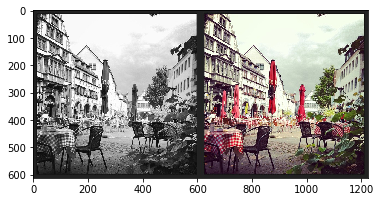

In [18]:
plt.imshow(cv.cvtColor(fin, cv.COLOR_BGR2RGB))

In [19]:
cv.imwrite('ciao.png', fin)

True

In [20]:
fin = cv.resize(fin, (512, 256))

In [21]:
cv.imwrite('ciao2.png', fin)

True

In [4]:
os.listdir(org_path)

['10249277_462865463875385_1056748167_n.jpg',
 '10299735_516965998430811_369641481_n.jpg',
 '10354525_290787101097275_667289369_n.jpg',
 '10358355_517059751739228_1064771593_n.jpg',
 '10362318_305744286249759_2101295450_n.jpg',
 '10369338_1506353382917809_405333991_n.jpg',
 '10387929_281876825322764_299081883_n.jpg',
 '10401686_581057228675158_449397196_n.jpg',
 '10413271_1516305585264382_2095532012_n.jpg',
 '10454196_1391893677800104_171117935_n.jpg',
 '10547310_546899762082903_648485405_n.jpg',
 '10597459_815901265096650_1682732293_n.jpg',
 '10632202_1535266806707761_1257968779_n.jpg',
 '10632227_1068088469878434_2057479988_n.jpg',
 '10654927_441516006055794_549020658_n.jpg',
 '10684318_630463370400621_939681856_n.jpg',
 '10727729_367261623430932_1014273777_n.jpg',
 '10727789_740357989335410_1479630088_n.jpg',
 '10731835_1556036771275387_1538260689_n.jpg',
 '10735299_801354356595074_537486112_n.jpg',
 '10735379_530674527035146_525153038_n.jpg',
 '10755798_1449878151899447_1643335094_